# Incentive Effects in the Demand for Health Care: A Bivariate Panel Count Data Estimation
According to the original paper by Riphahn (2000), http://qed.econ.queensu.ca/jae/2003-v18.4/riphahn-wambach-million/

Description of variables:
- id:     person - identification number
- female:     female = 1; male = 0
- year :     calendar year of the observation
- age :     age in years
- hsat :      health satisfaction, coded 0 (low) - 10 (high)
- handdum :      handicapped = 1; otherwise = 0
- handper :      degree of handicap in percent (0 - 100)
- hhninc :      household nominal monthly net income in German marks / 1000
- hhkids :     children under age 16 in the household = 1; otherwise = 0
- educ :     years of schooling
- married :     married = 1; otherwise = 0
- haupts:     highest schooling degree is Hauptschul degree = 1; otherwise = 0
- reals:      highest schooling degree is Realschul degree = 1; otherwise = 0
- fachhs:     highest schooling degree is Polytechnical degree = 1; otherwise = 0
- abitur:     highest schooling degree is Abitur = 1; otherwise = 0
- univ:   highest schooling degree is university degree = 1; otherwise = 0
- working:     employed = 1; otherwise = 0
- bluec:     blue collar employee = 1; otherwise = 0
- whitec:     white collar employee = 1; otherwise = 0
- self:     self employed = 1; otherwise = 0
- beamt:     civil servant = 1; otherwise = 0
- docvis:     number of doctor visits in last three months
- hospvis:     number of hospital visits in last calendar year
- public:     insured in public health insurance = 1; otherwise = 0
- addon:     insured by add-on insurance = 1; otherswise = 0
### Importing and cleaning data

In [66]:
clear
import delimited id female year age hsat handdum handper hhninc hhkids educ married haupts reals fachhs abitur univ working bluec whitec self beamt docvis hospvis public addon using rmw.csv, colrange(2:)

replace handdum = (handdum != 1) if year == 1987
replace married = (married != 1) if female == 0
replace hhkids = (hhkids != 1) if female == 0

summarize



(25 vars, 27,326 obs)

(3,666 real changes made)

(14,243 real changes made)

(14,243 real changes made)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          id |     27,326    3517.443    2014.628          1       7293
      female |     27,326    .4787748    .4995584          0          1
        year |     27,326    1987.823    3.170868       1984       1994
         age |     27,326    43.52569    11.33025         25         64
        hsat |     27,326    6.785426    2.293715          0         10
-------------+---------------------------------------------------------
     handdum |     27,326    .1097191    .3123918          0          1
     handper |     27,326    7.012285    19.26463          0        100
      hhninc |     27,326    3520.836    1769.083          0      30671
      hhkids |     27,326    .4934495    .4999662          0          1
        educ |     27,326  

In [69]:
summ handdum if year == 1987
drop if handdum != 1 & handdum != 0



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     handdum |      3,666     .111293    .3145375          0          1

(18 observations deleted)


a) Begin by fitting a Poisson model to this variable. The exogenous variables are listed in Table F7.1.
Determine an appropriate specification for the right-hand side of your model. Report the regression
results and the marginal effects.





In [83]:
poisson hospvis age hsat educ docvis i.handdum i.addon i.bluec, nolog

// poisson hospvis age female handdum hsat hhninc educ public


Poisson regression                              Number of obs     =     27,308
                                                LR chi2(7)        =    2123.85
                                                Prob > chi2       =     0.0000
Log likelihood = -12362.865                     Pseudo R2         =     0.0791

------------------------------------------------------------------------------
     hospvis |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.0071362   .0015424    -4.63   0.000    -.0101592   -.0041132
        hsat |   -.186052   .0069948   -26.60   0.000    -.1997616   -.1723424
        educ |   -.045944   .0084623    -5.43   0.000    -.0625299   -.0293582
      docvis |   .0306762   .0011552    26.55   0.000      .028412    .0329404
   1.handdum |   .2691112   .0439668     6.12   0.000     .1829378    .3552846
     1.addon |   .3218622   .1077161     2.99   0.

In [85]:
margins, dydx(*)


Average marginal effects                        Number of obs     =     27,308
Model VCE    : OIM

Expression   : Predicted number of events, predict()
dy/dx w.r.t. : age hsat educ docvis 1.handdum 1.addon 1.bluec

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.0009865   .0002138    -4.61   0.000    -.0014056   -.0005674
        hsat |  -.0257194   .0010537   -24.41   0.000    -.0277846   -.0236543
        educ |  -.0063512   .0011744    -5.41   0.000    -.0086529   -.0040495
      docvis |   .0042406    .000174    24.38   0.000     .0038996    .0045816
   1.handdum |   .0403667   .0071613     5.64   0.000     .0263309    .0544026
     1.addon |   .0521476   .0202966     2.57   0.010      .012367    .0919282
     1.bluec |  -.0148143   .00529

In [7]:
estat gof


         Deviance goodness-of-fit =  19984.01
         Prob > chi2(27318)       =    1.0000

         Pearson goodness-of-fit  =  125039.2
         Prob > chi2(27318)       =    0.0000


b) Estimate the model using ordinary least squares and compare your least squares results to the
marginal effects computed in part a). What do you find?


In [31]:
drop if handdum != 1 & handdum != 0

(18 observations deleted)


Description of variables:
- id:     person - identification number
- female:     female = 1; male = 0
- year :     calendar year of the observation
- age :     age in years
- hsat :      health satisfaction, coded 0 (low) - 10 (high)
- handdum :      handicapped = 1; otherwise = 0
- handper :      degree of handicap in percent (0 - 100)
- hhninc :      household nominal monthly net income in German marks / 1000
- hhkids :     children under age 16 in the household = 1; otherwise = 0
- educ :     years of schooling
- married :     married = 1; otherwise = 0
- haupts:     highest schooling degree is Hauptschul degree = 1; otherwise = 0
- reals:      highest schooling degree is Realschul degree = 1; otherwise = 0
- fachhs:     highest schooling degree is Polytechnical degree = 1; otherwise = 0
- abitur:     highest schooling degree is Abitur = 1; otherwise = 0
- univ:   highest schooling degree is university degree = 1; otherwise = 0
- working:     employed = 1; otherwise = 0
- bluec:     blue collar employee = 1; otherwise = 0
- whitec:     white collar employee = 1; otherwise = 0
- self:     sel|f employed = 1; otherwise = 0
- beamt:     civil servant = 1; otherwise = 0
- docvis:     number of doctor visits in last three months
- hospvis:     number of hospital visits in last calendar year
- public:     insured in public health insurance = 1; otherwise = 0
- addon:     insured by add-on insurance = 1; otherswise = 0

In [86]:
regress hospvis age hsat educ docvis i.handdum i.addon i.bluec


      Source |       SS           df       MS      Number of obs   =    27,308
-------------+----------------------------------   F(7, 27300)     =     91.40
       Model |  489.306593         7  69.9009419   Prob > F        =    0.0000
    Residual |  20877.8454    27,300  .764756242   R-squared       =    0.0229
-------------+----------------------------------   Adj R-squared   =    0.0226
       Total |   21367.152    27,307  .782478925   Root MSE        =     .8745

------------------------------------------------------------------------------
     hospvis |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.0015269   .0005016    -3.04   0.002    -.0025101   -.0005436
        hsat |  -.0240788   .0026008    -9.26   0.000    -.0291765   -.0189811
        educ |  -.0049511   .0024185    -2.05   0.041    -.0096916   -.0002106
      docvis |   .0170985   .0010107    16.92   0.

C) Is there evidence of overdispersion in the data? Test for overdispersion.


(bin=44, start=0, width=1.1590909)


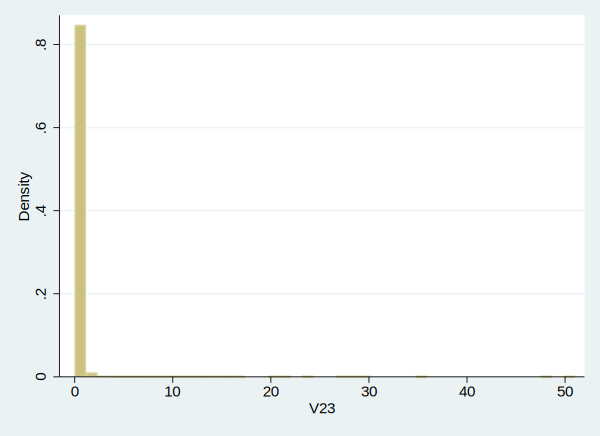





                             V23
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs              27,326
25%            0              0       Sum of Wgt.      27,326

50%            0                      Mean           .1382566
                        Largest       Std. Dev.       .884339
75%            0             35
90%            0             35       Variance       .7820555
95%            1             48       Skewness       26.67069
99%            2             51       Kurtosis       1101.923


In [22]:
hist hospvis
summ hospvis, detail

In [55]:
qui poisson hospvis age hsat i.handdum educ docvis, nolog
poisgof




         Deviance goodness-of-fit =   19500.7
         Prob > chi2(27302)       =    1.0000

         Pearson goodness-of-fit  =  121018.2
         Prob > chi2(27302)       =    0.0000


In [57]:
nbreg hospvis age hsat i.handdum educ docvis, nolog


Negative binomial regression                    Number of obs     =     27,308
                                                LR chi2(5)        =     961.88
Dispersion     = mean                           Prob > chi2       =     0.0000
Log likelihood = -9885.2851                     Pseudo R2         =     0.0464

------------------------------------------------------------------------------
     hospvis |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |  -.0071199   .0022033    -3.23   0.001    -.0114383   -.0028016
        hsat |  -.1509606   .0106409   -14.19   0.000    -.1718164   -.1301048
   1.handdum |   .3276369    .070773     4.63   0.000     .1889243    .4663496
        educ |  -.0394204   .0109483    -3.60   0.000    -.0608786   -.0179622
      docvis |   .0622447   .0043985    14.15   0.000     .0536237    .0708656
       _cons |  -.6688978   .1835466    -3.64   0.